In [1]:
import utils
import numpy as np
from deepchem import deepchem as dc
from deepchem.models import GraphConvModel

Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_sparse'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jaxlib'


In [2]:
utils.set_seed(50, tensorflow=True, pytorch=False)

In [3]:
data = utils.load_data('10K.csv', 10000, False)

In [4]:
data

,Unnamed: 0,i_i_glide_lignum,r_i_docking_score,SMILES,molecules,MolWt
0,0,13477,-13.126800,C[C@@H](NC(=O)N1C[C@H](c2ccccc2)[C@H]2COCC[C@H...,<rdkit.Chem.rdchem.Mol object at 0x000001CAFBA...,448.567
1,1,516,-12.662900,O=C(Nc1cccc(C(=O)N2CCC(c3c[nH]c4ncccc34)CC2)c1...,<rdkit.Chem.rdchem.Mol object at 0x000001CAFBA...,466.541
2,2,9425,-12.487000,Cc1nn(-c2ccccc2)c2nc(C(=O)N3CCC([C@H]4C(=O)Nc5...,<rdkit.Chem.rdchem.Mol object at 0x000001CAFBA...,451.530
3,3,14512,-12.483500,Cc1cc(C)cc(C(=O)N2CCC[C@H](C(=O)NCc3cccc([C@@]...,<rdkit.Chem.rdchem.Mol object at 0x000001CAFBA...,462.550
4,4,9615,-12.478500,CS(=O)(=O)c1ccc(F)c(C(=O)Nc2ccc(-c3nc(-c4ccccc...,<rdkit.Chem.rdchem.Mol object at 0x000001CAFBA...,436.468
...,...,...,...,...,...,...
9893,9893,2451,-0.560302,O=C([O-])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x000001CAFB9...,113.014
9894,9894,7813,-0.384887,Cc1cnn(C)c1S(=O)(=O)NC[C@@H](Cc1ccccn1)C(=O)[O-],<rdkit.Chem.rdchem.Mol object at 0x000001CAFB9...,337.381
9895,9895,11442,-0.269109,Cn1cccc(C(=O)N2CCN(C3CC3)c3ccc(Cl)cc32)c1=O,<rdkit.Chem.rdchem.Mol object at 0x000001CAFB9...,343.814
9896,9896,13971,-0.150473,O=C([O-])[C@H]1CC[C@@H](C(=O)N2CCCc3ccccc32)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001CAFB9...,286.351


In [8]:
featurizer = dc.feat.ConvMolFeaturizer()
train_data, valid_data, test_data, transformer = utils.receptor_data(data, 'r_i_docking_score', featurizer, input_transformer=utils.DoNothingTransformer)

In [9]:
train_data.y

array([-6.85068, -7.50225, -7.78079, ..., -7.56722, -5.66536, -8.94288])

In [10]:
transformer.untransform(train_data.y)

array([-6.85068, -7.50225, -7.78079, ..., -7.56722, -5.66536, -8.94288])

In [11]:
metric = dc.metrics.Metric(dc.metrics.r2_score)

model = GraphConvModel(
    n_tasks=1,
    mode='regression',
    graph_conv_layers=[64, 64]
)

train_model = utils.fit_best_tf(
    model,
    train_data,
    valid_data,
    [metric],
    [transformer],
    patience=5,
    high_is_better=True,
    model_name="GraphConvModel10K"
)

Epoch 1/100
{'r2_score': 0.07141389675700627}
Epoch 2/100
{'r2_score': 0.2918777805386338}
Epoch 3/100
{'r2_score': 0.39488795204338467}
Epoch 4/100
{'r2_score': 0.43916023530911796}
Epoch 5/100
{'r2_score': 0.5456418344519525}
Epoch 6/100
{'r2_score': 0.5726641171530511}
Epoch 7/100
{'r2_score': 0.5904514847402038}
Epoch 8/100
{'r2_score': 0.5592812876383905}
Epoch 9/100
{'r2_score': 0.5777322592801561}
Epoch 10/100
{'r2_score': 0.5745725349809061}
Epoch 11/100
{'r2_score': 0.5557728962400005}
Epoch 12/100
{'r2_score': 0.5607236841173915}
Early stopping triggered at epoch: 12
Best model found at epoch 7 with r2_score score: 0.5904514847402038


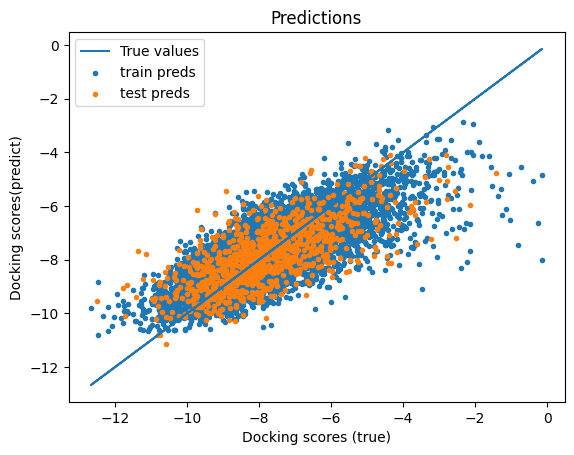

In [12]:
utils.plot_predictions(model, train_data, test_data, transformer)

In [15]:
utils.eval(model, test_data, [transformer])

RMSE   | 1.111
R2     | 0.512
MAE    | 0.842
mean   | -7.815
std    | 1.189


In [16]:
R2 = dc.metrics.Metric(dc.metrics.r2_score)
model.evaluate(valid_data, [R2], [transformer])

{'r2_score': 0.5904514847402038}

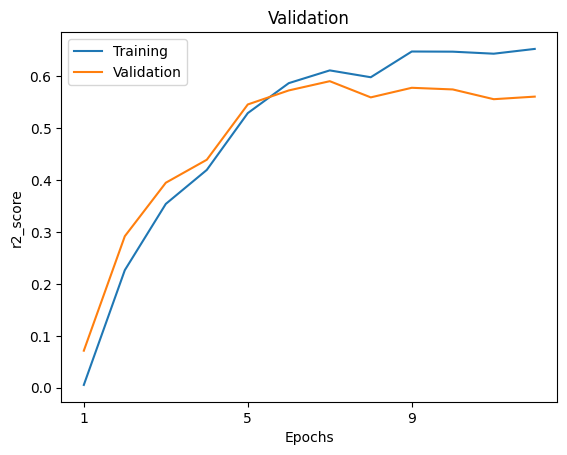

In [17]:
utils.plot_validation(train_model, metric)

In [29]:
# Remember when loading an old model one must also load the data.
# Featurizing the data is not strictly nessecary, but the current utility functions works
# with DeepChems NumpyDatasets so it is more easy to just redo the dataprocessing as usual.
data = utils.load_data('10K.csv', 6000, True)
featurizer = dc.feat.ConvMolFeaturizer()
train_data, valid_data, test_data, transformer = utils.receptor_data(data, 'r_i_docking_score', featurizer)

model_reload = GraphConvModel(
    n_tasks=1,
    mode='regression',
    graph_conv_layers=[64, 64]
)

model_reload.restore(model_dir='models/GraphConvModel10K01.ckpt/')

RMSE   | 1.043
R2     | 0.57
MAE    | 0.799
mean   | -7.738
std    | 1.271


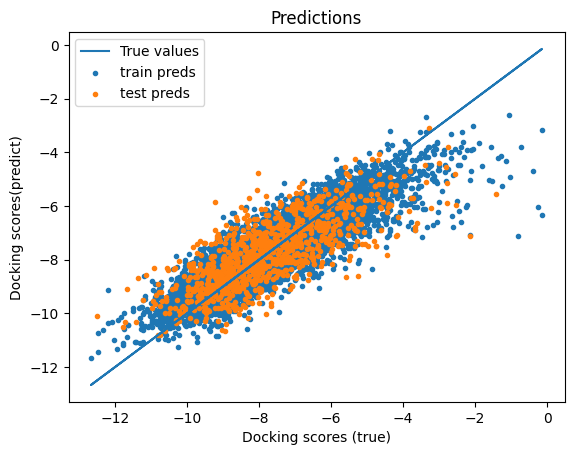

In [30]:
utils.plot_predictions(model_reload, train_data, test_data, transformer)
utils.eval(model_reload, test_data, [transformer])